In [3]:
import pandas as pd

In [2]:
def plot_training(base_path, base_model):
    derive_model = ["-128.csv", "-128,64.csv", "-N-128.csv", "-N-128,64.csv", "-NR-128.csv", "-NR-128,64.csv"]

    df = pd.read_csv(base_path + base_model + derive_model[0])
    for c in derive_model[1:]:
        cf = pd.read_csv(base_path + base_model + c)
        name = (base_model + c)[:-4]
        df[name] = cf["Value"]
    
    data = df.rename(columns={"Value": base_model + "-128"}).drop(["Wall time", "Step"], axis=1)
    data.plot().grid()

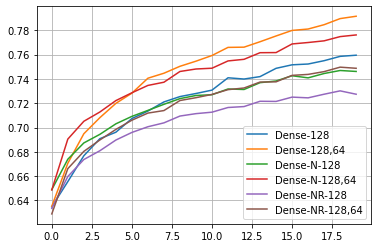

In [3]:
plot_training("logs/run_results/accuracy/", "Dense")

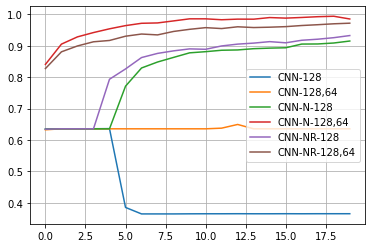

In [4]:
plot_training("logs/run_results/accuracy/", "CNN")

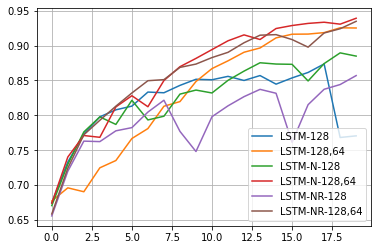

In [5]:
plot_training("logs/run_results/accuracy/", "LSTM")

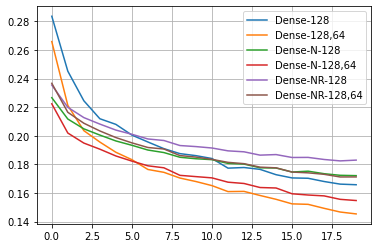

In [6]:
plot_training("logs/run_results/loss/", "Dense")

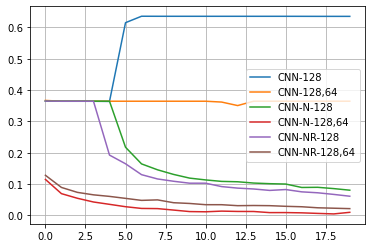

In [7]:
plot_training("logs/run_results/loss/", "CNN")

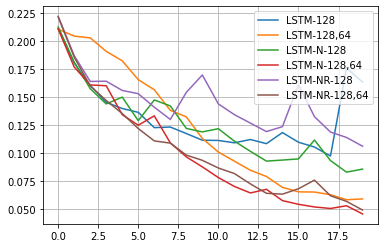

In [8]:
plot_training("logs/run_results/loss/", "LSTM")

In [6]:
def get_df_best(base_path):
    derive_model = ["accuracy-train.csv", "accuracy-validation.csv", "loss-train.csv", "loss-validation.csv"]

    df = pd.read_csv(base_path + derive_model[0])
    for c in derive_model[1:]:
        cf = pd.read_csv(base_path + c)
        name = c[:-4]
        df[name] = cf["Value"]
    
    return df.rename(columns={"Value": "accuracy-train"}).drop(["Wall time", "Step"], axis=1)
    

In [7]:
best_df = get_df_best("logs/run_results/best/")

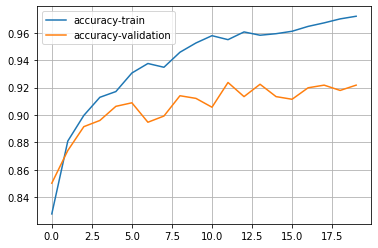

In [11]:
best_df.iloc[:, 0:2].plot().grid()

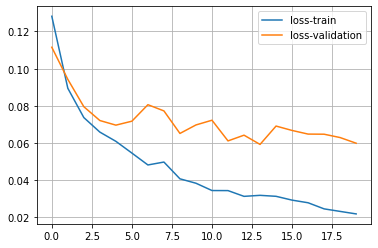

In [13]:
best_df.iloc[:, 2:4].plot().grid()